**Project Intro**

Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.


**Please use the Seoul Bike dataset.**


What are the factors that influence the number of bikes rented?

Explore the data for outliers and missing values.

Plot the correlation between the variables and state your comments

Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.

Coment on Model performance by using approapriate diagnostics and measures.

In [493]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


In [494]:
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [495]:
df = pd.read_csv('/content/SeoulBikeData.csv')
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [496]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

###Factors influencing no. of bikes rented

In [498]:
print("Factors influencing bikes rented:",df.columns.values)

Factors influencing bikes rented: ['Date' 'Rented Bike Count' 'Hour' 'Temperature(C)' 'Humidity(%)'
 'Wind speed (m/s)' 'Visibility (10m)' 'Dew point temperature(C)'
 'Solar Radiation (MJ/m2)' 'Rainfall(mm)' 'Snowfall (cm)' 'Seasons'
 'Holiday' 'Functioning Day']


### Dimensions of the data

In [499]:
df.shape

(8760, 14)

### Explore the data for outliers and missing values.



In [500]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

### Another way to find the missing values is to plot a heatmap for visualization.

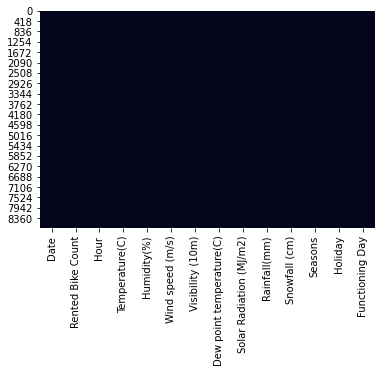

In [501]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

#### There are no horizontal lines in the heatmap which would correspond to a probable missing values.

In [502]:
# summary of categorical variables
df.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,03/05/2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


In [503]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

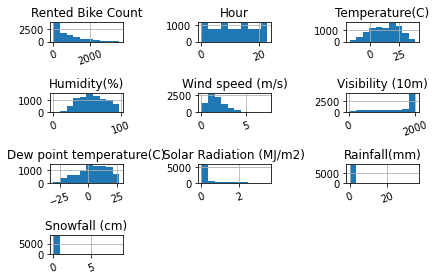

In [504]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [505]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [506]:
#Considering date
from datetime import datetime
df.Date=pd.to_datetime(df.Date )
df.info()
df['Month']=pd.DatetimeIndex(df['Date']).month
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [507]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018


In [508]:
df['tday']=pd.DatetimeIndex(df['Date']).day
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


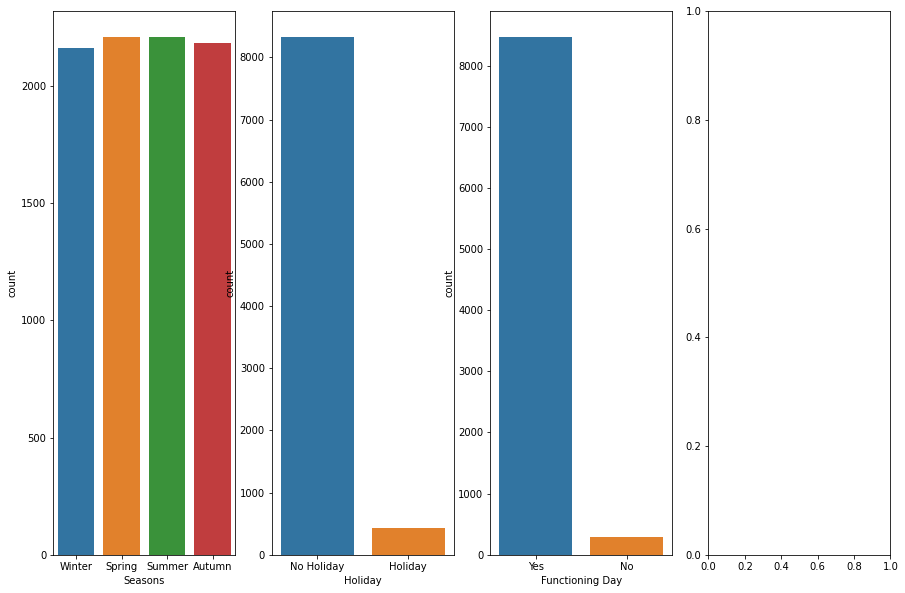

In [509]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 4, figsize = (15,10))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)
    
# display the plot
plt.show()

## Rented Bike Count  

##Data outliers and missing values:

In [510]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
Month                       0
Year                        0
tday                        0
dtype: int64

###Check for outliers

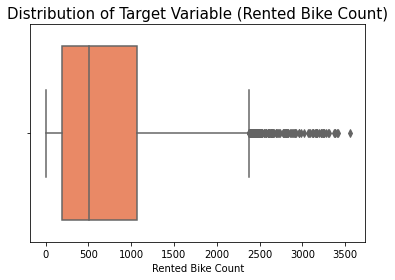

In [511]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Rented Bike Count'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Rented Bike Count)', fontsize = 15)

# display the plot
plt.show()

In [512]:
Q1 = np.percentile(df['Rented Bike Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Rented Bike Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Rented Bike Count'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR) # 3.0

Q1 25 percentile of the given data is,  191.0
Q1 50 percentile of the given data is,  504.5
Q1 75 percentile of the given data is,  1065.5
Interquartile range is 874.5


In [513]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR # 340000
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is -1120.75
up_limit is 2377.25


In [514]:
df.rename(columns = {'Rented Bike Count':'RBC'}, inplace = True)

In [515]:
df1 = df[df.RBC< 2377.25]


In [516]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8603 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8603 non-null   datetime64[ns]
 1   RBC                       8603 non-null   int64         
 2   Hour                      8603 non-null   int64         
 3   Temperature(C)            8603 non-null   float64       
 4   Humidity(%)               8603 non-null   int64         
 5   Wind speed (m/s)          8603 non-null   float64       
 6   Visibility (10m)          8603 non-null   int64         
 7   Dew point temperature(C)  8603 non-null   float64       
 8   Solar Radiation (MJ/m2)   8603 non-null   float64       
 9   Rainfall(mm)              8603 non-null   float64       
 10  Snowfall (cm)             8603 non-null   float64       
 11  Seasons                   8603 non-null   object        
 12  Holiday             

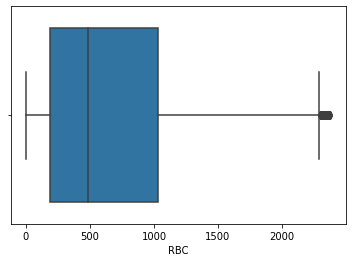

In [517]:
import seaborn as sns
sns.boxplot(df1['RBC'])

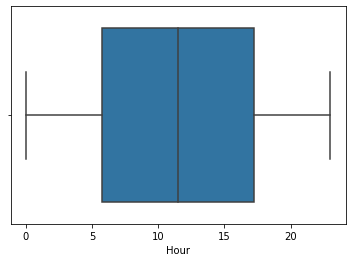

In [518]:
sns.boxplot(df['Hour'])

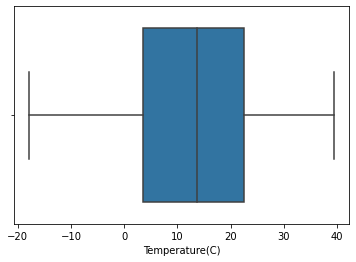

In [519]:
sns.boxplot(df['Temperature(C)'])

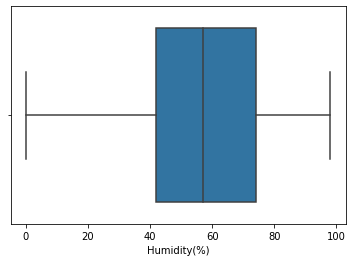

In [520]:
sns.boxplot(df['Humidity(%)'])

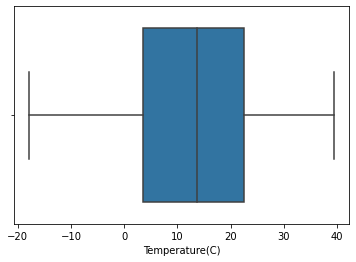

In [521]:
sns.boxplot(df['Temperature(C)'])

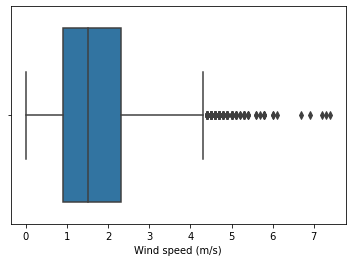

In [522]:
sns.boxplot(df['Wind speed (m/s)'])

In [523]:
Q1 = np.percentile(df['Wind speed (m/s)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Wind speed (m/s)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Wind speed (m/s)'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  0.9
Q1 50 percentile of the given data is,  1.5
Q1 75 percentile of the given data is,  2.3
Interquartile range is 1.4


In [524]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is -1.1999999999999997
up_limit is 4.3999999999999995


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   RBC                       8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [526]:
df.rename(columns = {'Wind speed (m/s)':'WS'}, inplace = True)

In [527]:
df1 = df[df.WS< 4.399]

In [528]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8599 non-null   datetime64[ns]
 1   RBC                       8599 non-null   int64         
 2   Hour                      8599 non-null   int64         
 3   Temperature(C)            8599 non-null   float64       
 4   Humidity(%)               8599 non-null   int64         
 5   WS                        8599 non-null   float64       
 6   Visibility (10m)          8599 non-null   int64         
 7   Dew point temperature(C)  8599 non-null   float64       
 8   Solar Radiation (MJ/m2)   8599 non-null   float64       
 9   Rainfall(mm)              8599 non-null   float64       
 10  Snowfall (cm)             8599 non-null   float64       
 11  Seasons                   8599 non-null   object        
 12  Holiday             

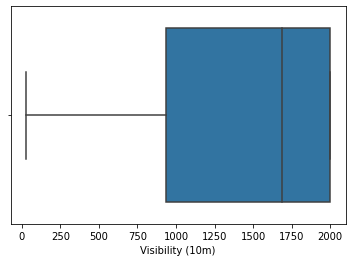

In [529]:
sns.boxplot(df1['Visibility (10m)'])

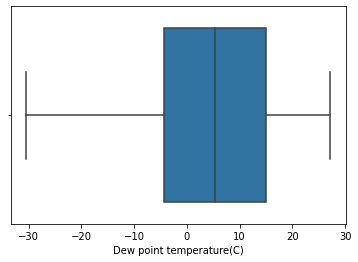

In [530]:
sns.boxplot(df1['Dew point temperature(C)'])

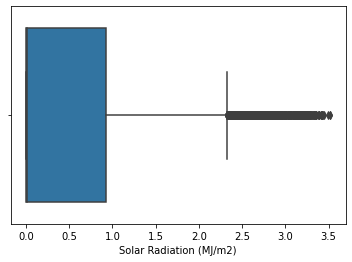

In [531]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

In [532]:
df.rename(columns = {'Solar Radiation (MJ/m2)':'solar_radiation'}, inplace = True)

In [533]:
Q1 = np.percentile(df['solar_radiation'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['solar_radiation'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['solar_radiation'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  0.01
Q1 75 percentile of the given data is,  0.93
Interquartile range is 0.93


In [534]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim) 

low_limit is -1.395
up_limit is 2.325


In [535]:
df1 = df[df.solar_radiation< 2.325]

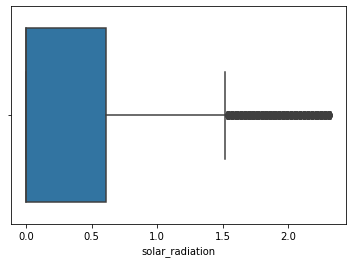

In [536]:
sns.boxplot(df1['solar_radiation'])

In [537]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8119 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8119 non-null   datetime64[ns]
 1   RBC                       8119 non-null   int64         
 2   Hour                      8119 non-null   int64         
 3   Temperature(C)            8119 non-null   float64       
 4   Humidity(%)               8119 non-null   int64         
 5   WS                        8119 non-null   float64       
 6   Visibility (10m)          8119 non-null   int64         
 7   Dew point temperature(C)  8119 non-null   float64       
 8   solar_radiation           8119 non-null   float64       
 9   Rainfall(mm)              8119 non-null   float64       
 10  Snowfall (cm)             8119 non-null   float64       
 11  Seasons                   8119 non-null   object        
 12  Holiday             

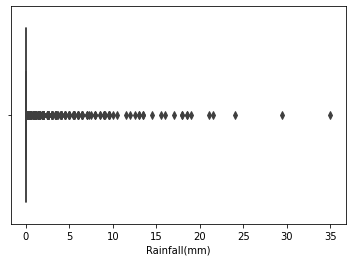

In [538]:
sns.boxplot(df1['Rainfall(mm)'])

In [539]:
Q1 = np.percentile(df['Rainfall(mm)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Rainfall(mm)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Rainfall(mm)'], 75, interpolation = 'midpoint')   
print('Q1 25 percentile of the given data is, ', Q1) 
print('Q1 50 percentile of the given data is, ', Q2) 
print('Q1 75 percentile of the given data is, ', Q3)   
IQR = Q3 - Q1  
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  0.0
Q1 50 percentile of the given data is,  0.0
Q1 75 percentile of the given data is,  0.0
Interquartile range is 0.0


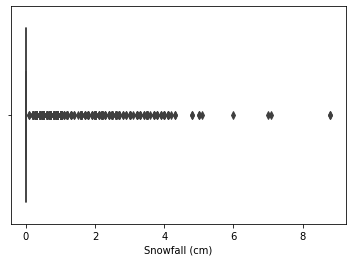

In [540]:
sns.boxplot(df1['Snowfall (cm)'])

### Plot the correlation between the variables and state your comments

###Co-relation matrix:

In [541]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df1.corr()

# print the correlation matrix
corrmat

,RBC,Hour,Temperature(C),Humidity(%),WS,Visibility (10m),Dew point temperature(C),solar_radiation,Rainfall(mm),Snowfall (cm),Month,Year,tday
RBC,1.000000,0.410111,0.538829,-0.172236,0.105074,0.193911,0.382971,0.240505,-0.120928,-0.138613,0.078383,0.209128,0.045348
Hour,0.410111,1.000000,0.113083,-0.235184,0.283799,0.095713,-0.002902,0.147904,0.010987,-0.018707,0.002635,-0.005180,-0.000621
Temperature(C),0.538829,0.113083,1.000000,0.246056,-0.086725,0.008339,0.924679,0.243452,0.063546,-0.217033,0.056912,0.375784,0.081707
Humidity(%),-0.172236,-0.235184,0.246056,1.000000,-0.313250,-0.549532,0.585728,-0.408404,0.237735,0.100114,0.037335,0.061717,0.011514
WS,0.105074,0.283799,-0.086725,-0.313250,1.000000,0.166906,-0.201594,0.301783,-0.013511,0.005627,-0.077236,-0.020630,-0.061038
Visibility (10m),0.193911,0.095713,0.008339,-0.549532,0.166906,1.000000,-0.193147,0.127082,-0.168260,-0.120282,0.078709,0.046049,-0.104418
Dew point temperature(C),0.382971,-0.002902,0.924679,0.585728,-0.201594,-0.193147,1.000000,0.029351,0.132673,-0.149614,0.063520,0.336698,0.070817
solar_radiation,0.240505,0.147904,0.243452,-0.408404,0.301783,0.127082,0.029351,1.000000,-0.068970,-0.054556,-0.008837,0.096852,-0.009413
Rainfall(mm),-0.120928,0.010987,0.063546,0.237735,-0.013511,-0.168260,0.132673,-0.068970,1.000000,0.006723,-0.024577,0.030826,0.012574
Snowfall (cm),-0.138613,-0.018707,-0.217033,0.100114,0.005627,-0.120282,-0.149614,-0.054556,0.006723,1.000000,0.054524,-0.203266,0.105448


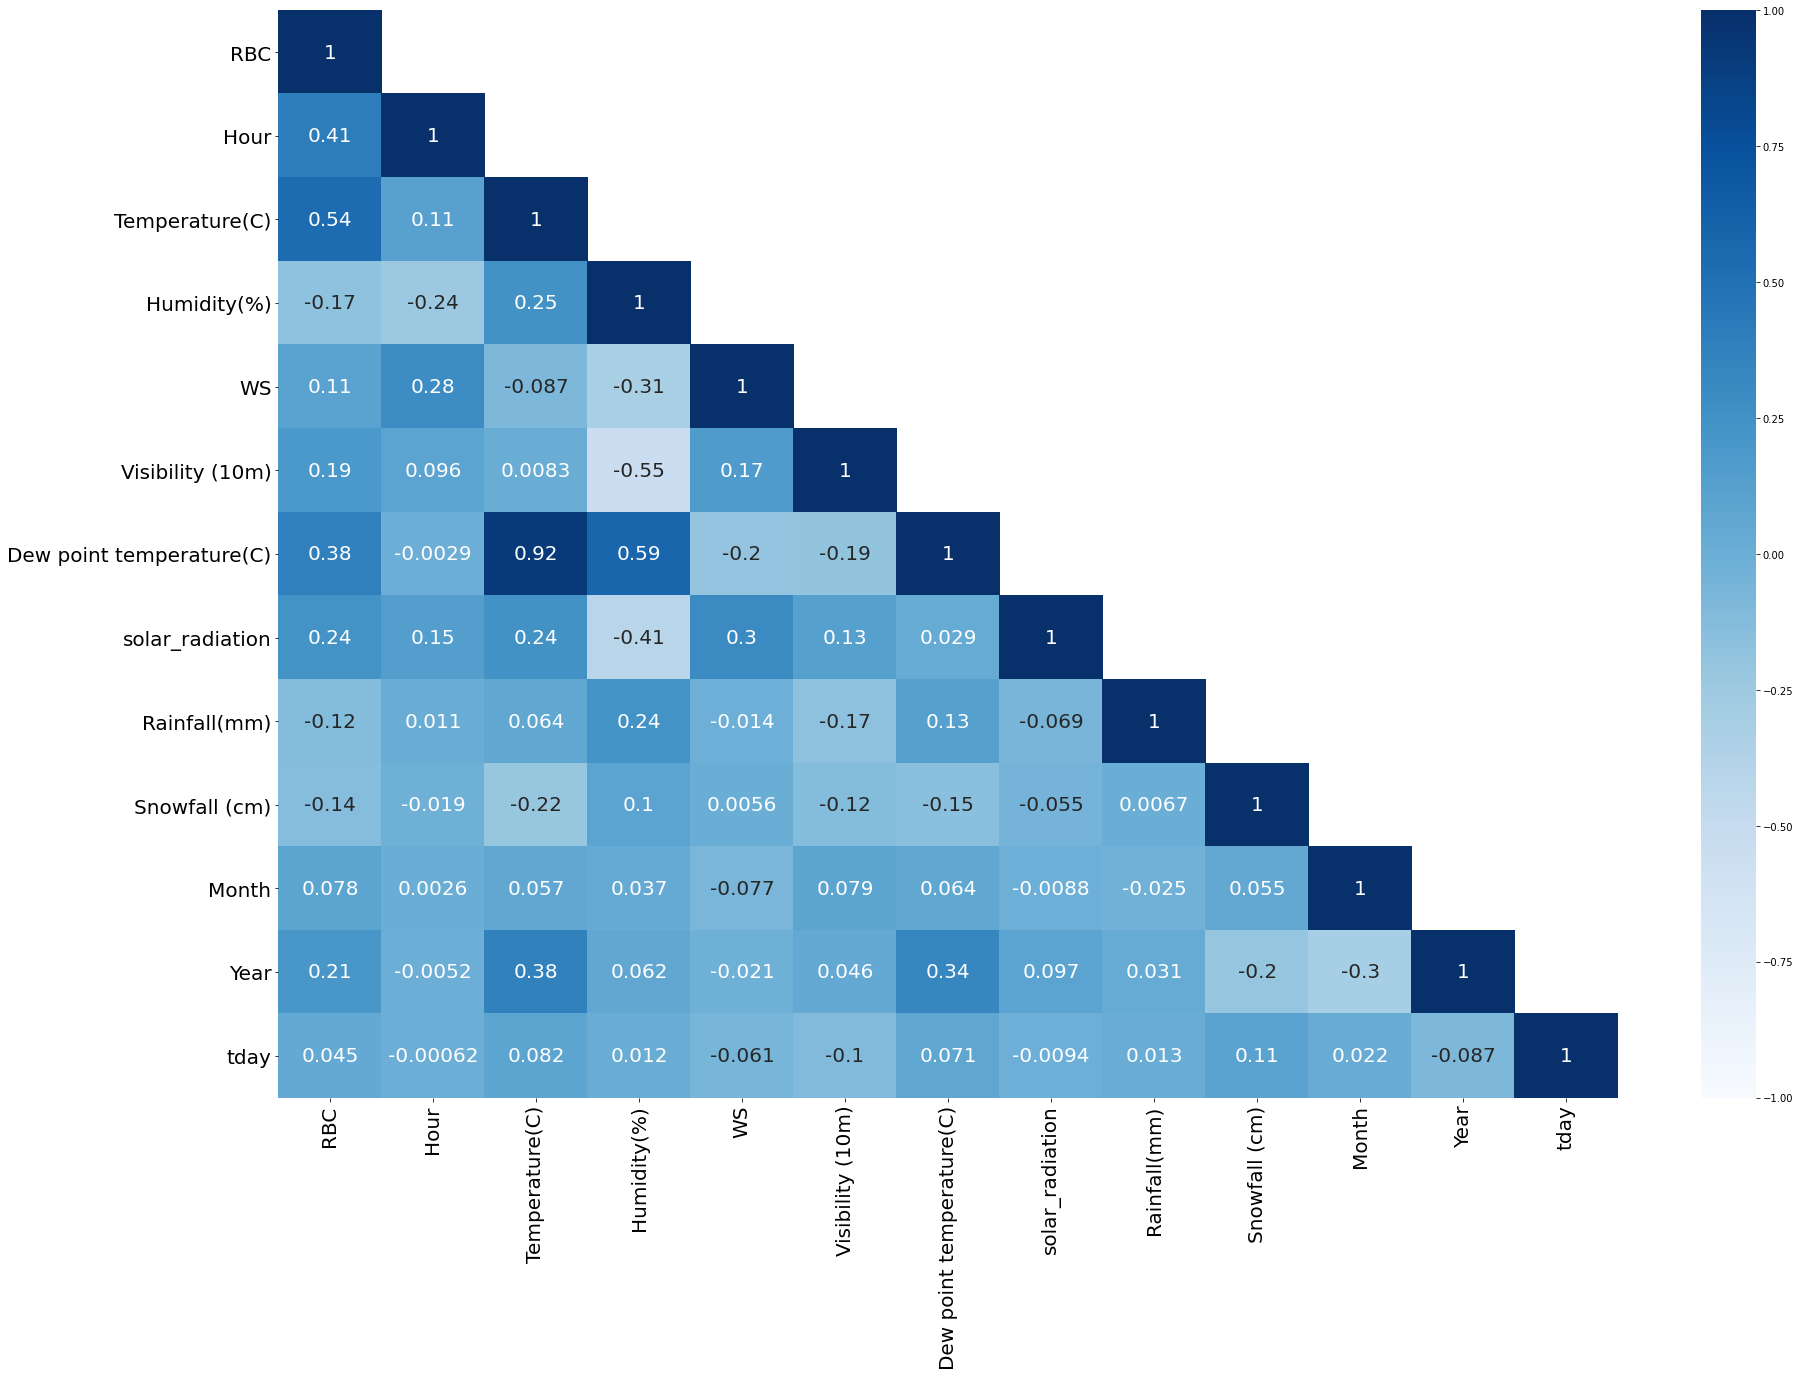

In [542]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

#### There are some Positive correlation between:
- Rented Bike Count and Hour
- Rented Bike Count and Temperature
- Rented Bike Count and Dew Point Temperature
- Dew Point Temperature and Temperature and Humidity

### There are some Negative correlation between:
- Rented Bike Count and Humidity
- Humidity and Solar Radiation
- Humidity and Visibility
- Humidity and Wind speed


In [543]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8119 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8119 non-null   datetime64[ns]
 1   RBC                       8119 non-null   int64         
 2   Hour                      8119 non-null   int64         
 3   Temperature(C)            8119 non-null   float64       
 4   Humidity(%)               8119 non-null   int64         
 5   WS                        8119 non-null   float64       
 6   Visibility (10m)          8119 non-null   int64         
 7   Dew point temperature(C)  8119 non-null   float64       
 8   solar_radiation           8119 non-null   float64       
 9   Rainfall(mm)              8119 non-null   float64       
 10  Snowfall (cm)             8119 non-null   float64       
 11  Seasons                   8119 non-null   object        
 12  Holiday             

In [544]:
df1.drop(['Date'],axis='columns', inplace=True)

In [545]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8119 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RBC                       8119 non-null   int64  
 1   Hour                      8119 non-null   int64  
 2   Temperature(C)            8119 non-null   float64
 3   Humidity(%)               8119 non-null   int64  
 4   WS                        8119 non-null   float64
 5   Visibility (10m)          8119 non-null   int64  
 6   Dew point temperature(C)  8119 non-null   float64
 7   solar_radiation           8119 non-null   float64
 8   Rainfall(mm)              8119 non-null   float64
 9   Snowfall (cm)             8119 non-null   float64
 10  Seasons                   8119 non-null   object 
 11  Holiday                   8119 non-null   object 
 12  Functioning Day           8119 non-null   object 
 13  Month                     8119 non-null   int64  
 14  Year    

In [546]:
print(df.sample(10))

           Date   RBC  Hour  Temperature(C)  ...  Functioning Day  Month  Year  tday
372  2017-12-16   252    12            -4.1  ...              Yes     12  2017    16
1566 2018-04-02    23     6           -11.8  ...              Yes      4  2018     2
4950 2018-06-25   785     6            21.3  ...              Yes      6  2018    25
6456 2018-08-27   325     0            20.5  ...              Yes      8  2018    27
2033 2018-02-23   470    17             7.9  ...              Yes      2  2018    23
8142 2018-05-11   448     6             7.2  ...              Yes      5  2018    11
4346 2018-05-31   470     2            15.2  ...              Yes      5  2018    31
4980 2018-06-26    10    12            20.5  ...              Yes      6  2018    26
4341 2018-05-30  2074    21            18.2  ...              Yes      5  2018    30
5786 2018-07-30   363     2            28.0  ...              Yes      7  2018    30

[10 rows x 17 columns]


In [547]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df1.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['RBC', 'Hour', 'Temperature(C)', 'Humidity(%)', 'WS',
       'Visibility (10m)', 'Dew point temperature(C)', 'solar_radiation',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'tday'],
      dtype='object')

In [548]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features

df_categoric_features = df1.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [549]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [550]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df2 = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df2.head()

,RBC,Hour,Temperature(C),Humidity(%),WS,Visibility (10m),Dew point temperature(C),solar_radiation,Rainfall(mm),Snowfall (cm),Month,Year,tday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12,0,0,1,1,1


In [551]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8119 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RBC                       8119 non-null   int64  
 1   Hour                      8119 non-null   int64  
 2   Temperature(C)            8119 non-null   float64
 3   Humidity(%)               8119 non-null   int64  
 4   WS                        8119 non-null   float64
 5   Visibility (10m)          8119 non-null   int64  
 6   Dew point temperature(C)  8119 non-null   float64
 7   solar_radiation           8119 non-null   float64
 8   Rainfall(mm)              8119 non-null   float64
 9   Snowfall (cm)             8119 non-null   float64
 10  Month                     8119 non-null   int64  
 11  Year                      8119 non-null   int64  
 12  tday                      8119 non-null   int64  
 13  Seasons_Spring            8119 non-null   uint8  
 14  Seasons_

In [552]:
#Spliting dataframe into train and test by manually as intially we have two dataframes train and test.
#df_train = df2[:4059]
#df_test = df2[4059:]

In [553]:
import math
df2['Year']=df2['Year']-df2['Year'][0]
df2['tday']=df2['tday']-df2['tday'][0]
df2

,RBC,Hour,Temperature(C),Humidity(%),WS,Visibility (10m),Dew point temperature(C),solar_radiation,Rainfall(mm),Snowfall (cm),Month,Year,tday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,1,18,0,0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,1,18,0,0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,1,18,0,0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,1,18,0,0,0,1,1


##Build LR model:

In [554]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df2, test_size=0.25)

In [555]:
#considering only the highly correlated features for training and validation
train_x = train.drop(['RBC'], axis = 1)
train_y = train['RBC']             # output of the training data

val_x = val.drop(['RBC'], axis = 1)
val_y = val['RBC']

In [556]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6089, 17)
Dimension of train_y dataframe: (6089,)
Dimension of val_x dataframe: (2030, 17)
Dimension of val_y dataframe: (2030,)


In [557]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Model Stats:

In [558]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(val_y,df_pred))

Mean Absolute Error of linear regression: 329.69186478025716
Mean Square Error of linear regression: 196537.62918108216
R_Squared Score of linear regression: 0.5377644765957019


##Fitting in another model

In [559]:
import statsmodels.api as sm

In [560]:
#Ridge
from sklearn.linear_model import Ridge
X=df2.drop('RBC',axis=1)
Y=df2['RBC']
x_train,y_train,x_test,y_test = train_test_split( X, Y, test_size = 0.2,random_state=0)
ridge = Ridge()
ridge
ridge.fit(x_train,x_test)
rp=ridge.predict(y_train)
#ridge_score = ridge.score(rp,y_test)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_
print("L2 Regression:")
print("R-square score:", r2_score(y_test,rp))
#print("training score",ridge_score)
print("number of feature used:",coeff_used)

L2 Regression:
R-square score: 0.5614229070588099
number of feature used: 17


In [561]:
#Lasso
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(x_train,x_test)
lp=lasso.predict(y_train)
#lasso_score = lasso.score()
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("L1 Regression:")
print("R-squared score:",r2_score(y_test,lp))
#print("training score",lasso_score)
print("number of feature used:",coeff_used)

L1 Regression:
R-squared score: 0.5602724039724054
number of feature used: 17


In [562]:
X = df2.drop(['RBC'], axis = 1)

# extract the target variable from the data set
y = df2[['RBC']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (5683, 17)
The shape of X_test is: (2436, 17)
The shape of y_train is: (5683, 1)
The shape of y_test is: (2436, 1)


In [563]:
# build a full model using OLS()\
# use fit() to fit the model on train data
linreg_full_model = sm.OLS(y_train['RBC'], X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    RBC   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1224.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):                        0.00
Time:                        00:51:54   Log-Likelihood:                         -42618.
No. Observations:                5683   AIC:                                  8.527e+04
Df Residuals:                    5666   BIC:                                  8.538e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------